In [14]:
import word2vec

In [36]:
# Setup - train model 
word2vec.word2vec('example/data/text8', 'example/data/text8.bin', size=1000, binary=True, verbose=True)

Running command: word2vec -train example/data/text8 -output example/data/text8.bin -size 1000 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file example/data/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 133.17k  thread/sec: 128.11k  d/sec: 117.26k  24794  Progress: 0.84%  Words/thread/sec: 124.35k   126.24k  a: 0.024763  Progress: 0.96%  Words/thread/sec: 122.85k  2k  24712  Progress: 1.16%  Words/thread/sec: 128.06k  lpha: 0.024686  Progress: 1.27%  Words/thread/sec: 126.04k  hread/sec: 128.89k  s/thread/sec: 128.47k   0.024636  Progress: 1.47%  Words/thread/sec: 128.88k  585  Progress: 1.67%  Words/thread/sec: 132.07k  6  Progress: 1.71%  Words/thread/sec: 127.14k  rogress: 1.88%  Words/thread/sec: 128.26k  1  Progress: 1.89%  Words/thread/sec: 128.21k  s: 2.08%  Words/thread/sec: 130.27k  k  8%  Words/thread/sec: 131.99k   0.02441

In [37]:
model = word2vec.load('example/data/text8.bin')

In [42]:
import itertools

countTotal = 0
correctCount = 0

with open('./Bigger Analogy Test Set/1_Inflectional_morphology/I06 [verb_inf - Ving].txt') as file:
    for line1,line2 in itertools.zip_longest(*[file]*2):
        line1 = line1.split('\t')
        line2 = line2.split('\t')
        line1[1] = line1[1].rstrip()
        line2[1] = line2[1].rstrip()
        countTotal += 1
        try:
            indexes, metrics = model.analogy(pos=[line1[0], line2[1]], neg=[line1[1]])
            if (model.vocab[indexes].__contains__(line2[0])):
                correctCount += 1
                print("Correct answer is " + line2[0] + ". Model guessed correctly.")
            else:
                print("Correct answer is " + line2[0] + ". Model guessed " + model.vocab[indexes][0])
        except:
             print("Correct answer is " + line2[0] + ". Model did not recognize a word in analogy.")
        #print(line1[0], line1[1], line2[0], line2[1])
    print("Accuracy rate: ", correctCount/countTotal*100, "%")

Correct answer is add. Model guessed correctly.
Correct answer is appear. Model guessed correctly.
Correct answer is ask. Model guessed correctly.
Correct answer is avoid. Model guessed correctly.
Correct answer is believe. Model guessed asserted
Correct answer is contain. Model guessed correctly.
Correct answer is create. Model guessed correctly.
Correct answer is encourage. Model guessed correctly.
Correct answer is ensure. Model guessed correctly.
Correct answer is exist. Model guessed adapt
Correct answer is follow. Model guessed correctly.
Correct answer is identify. Model guessed correctly.
Correct answer is include. Model guessed correctly.
Correct answer is learn. Model guessed correctly.
Correct answer is maintain. Model guessed correctly.
Correct answer is operate. Model guessed connect
Correct answer is prevent. Model guessed correctly.
Correct answer is protect. Model guessed correctly.
Correct answer is receive. Model guessed correctly.
Correct answer is refer. Model guess

In [1]:
import pandas as pd

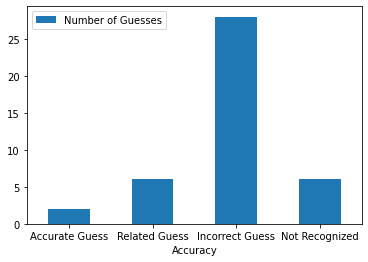

In [7]:
df = pd.DataFrame({'Accuracy':['Accurate Guess', 'Related Guess', 'Incorrect Guess', 'Not Recognized'], 'Number of Guesses':[2, 6, 28, 6]})
ax = df.plot.bar(x='Accuracy', y='Number of Guesses', rot=0)